In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import arviz as az
from scipy.constants import golden
import scipy.stats as stats

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
%config InlineBackend.figure_format = 'retina'
%load_ext watermark

RANDOM_SEED = 42
rng = np.random.default_rng(RANDOM_SEED)

az.style.use("arviz-darkgrid")
sns.set_theme(palette="colorblind")

In [3]:
rng.uniform(0, 1, size=1)

array([0.77395605])

In [4]:
rng.uniform(0, 1, size=20)

array([0.43887844, 0.85859792, 0.69736803, 0.09417735, 0.97562235,
       0.7611397 , 0.78606431, 0.12811363, 0.45038594, 0.37079802,
       0.92676499, 0.64386512, 0.82276161, 0.4434142 , 0.22723872,
       0.55458479, 0.06381726, 0.82763117, 0.6316644 , 0.75808774])

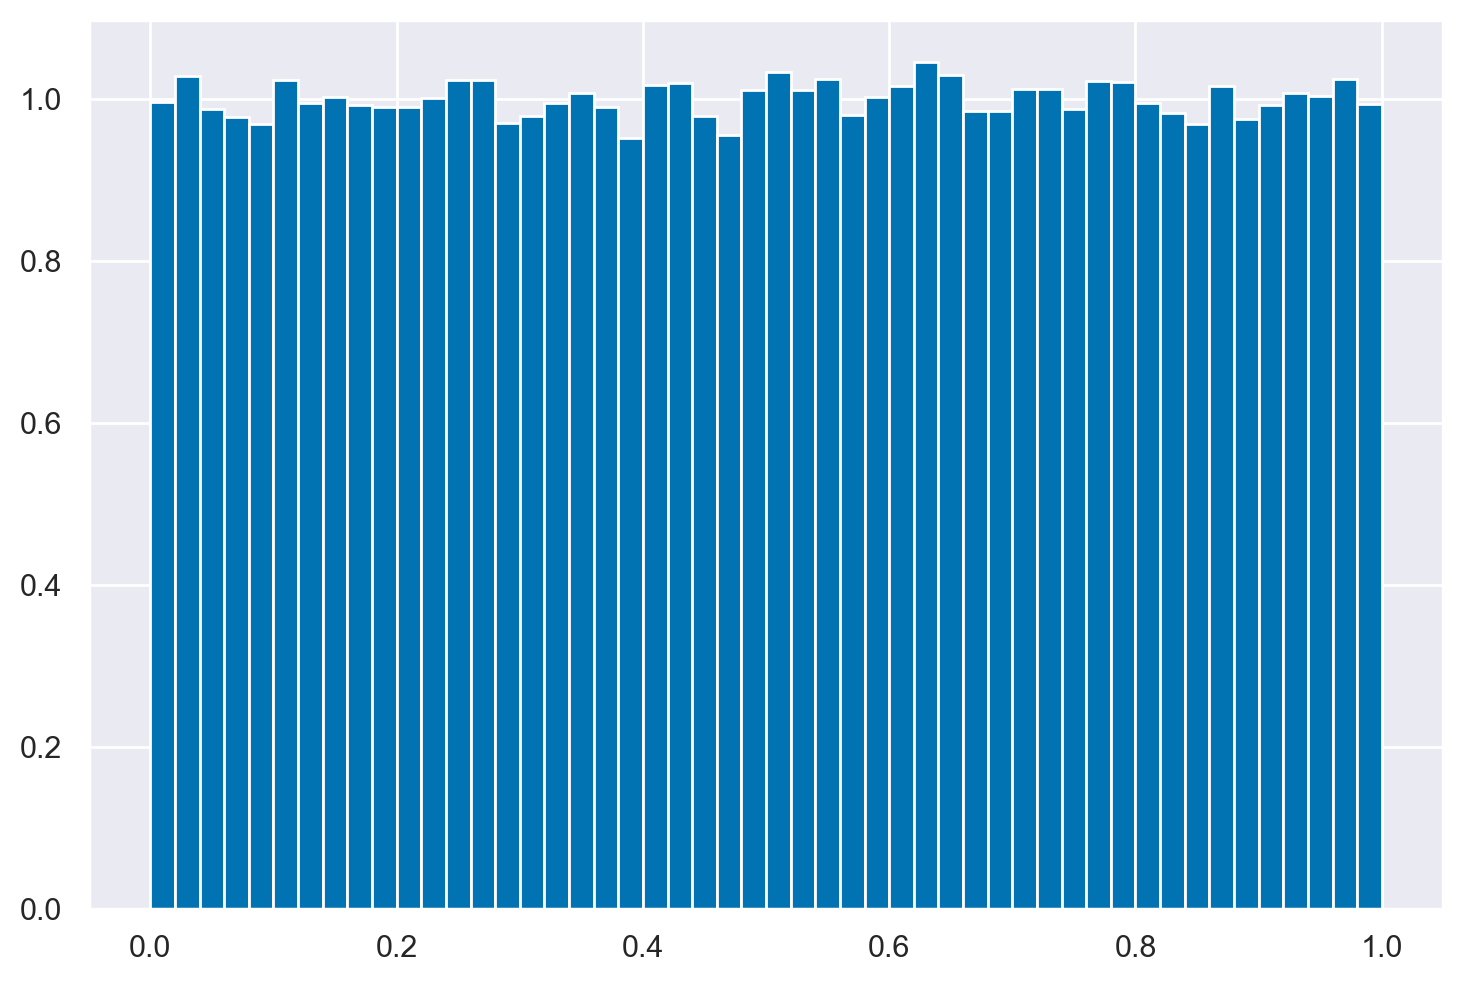

In [5]:
_ = plt.hist(rng.uniform(0, 1, size=100000), bins=50, density=True)

In [6]:
x = rng.normal(loc=100, scale=15, size=10)
print(x)

[ 94.43605826 111.7309541   81.26336296  81.17729066 100.84159754
  83.32674644 119.49706508  95.16799064  79.23341602  97.77136425]


(40.0, 160.0)

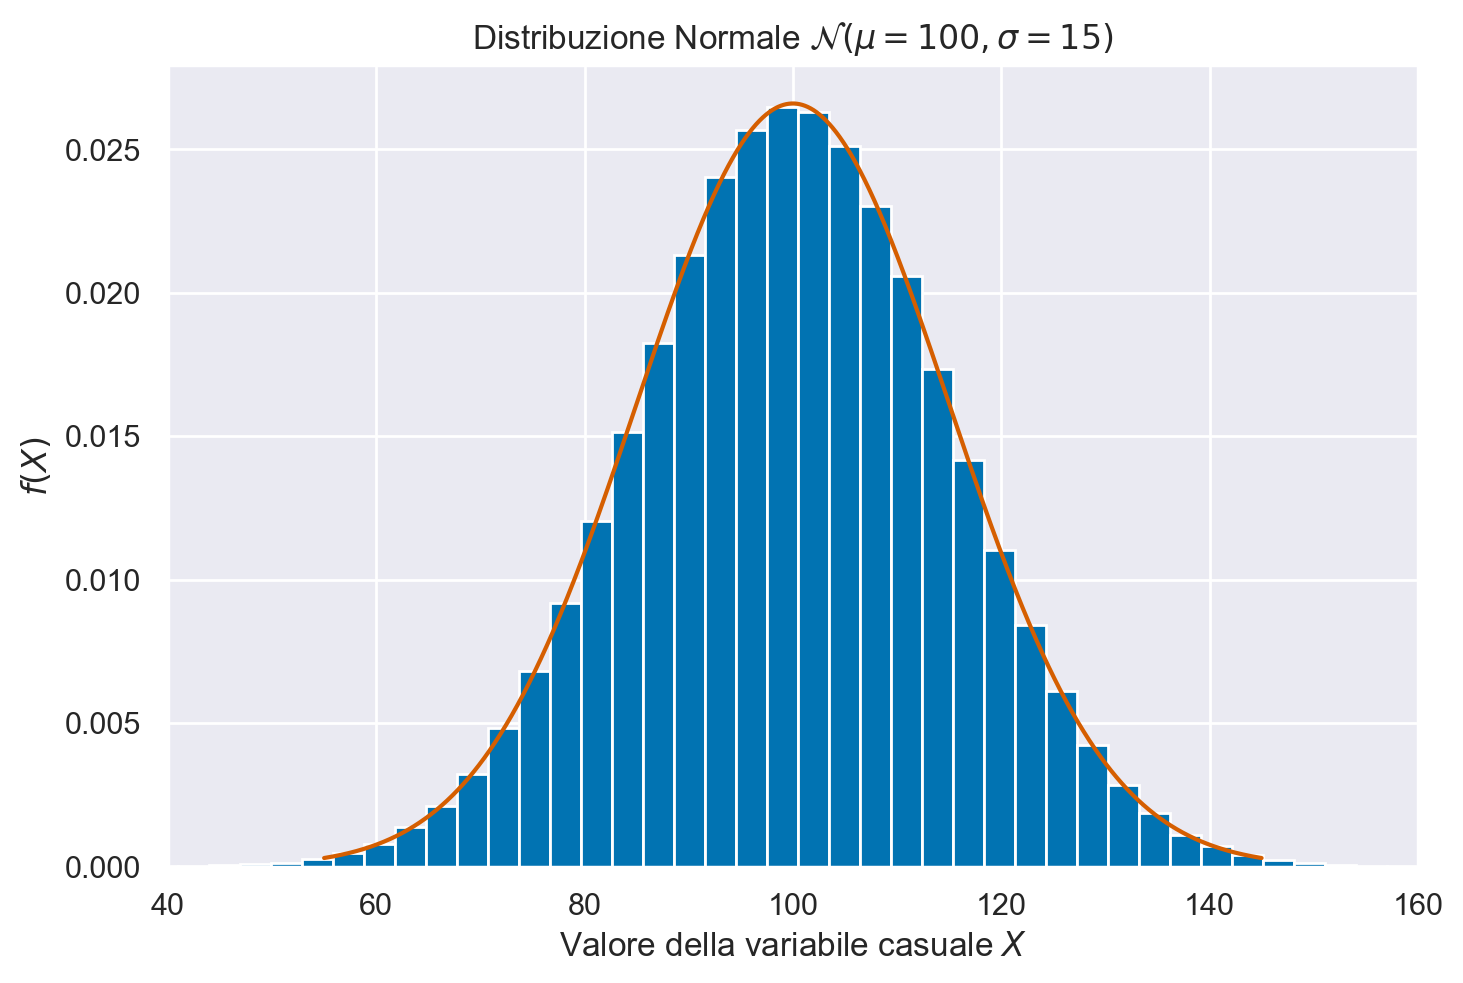

In [7]:
n = 1000000
mu = 100
sigma = 15
# create x's
xs = np.linspace(55, 145, 100001)
y_pdf = stats.norm.pdf(xs, mu, sigma)
# create random samples
samps = rng.normal(loc=mu, scale=sigma, size=n)
# plot them
plt.plot(xs, y_pdf, color="r")
plt.hist(samps, bins=50, density=True)
plt.title("Distribuzione Normale $\mathcal{N}(\mu=100, \sigma=15)$")
plt.ylabel("$f(X)$")
plt.xlabel("Valore della variabile casuale $X$")
plt.xlim(40, 160)

Text(0.5, 0, 'Valore della variabile casuale $X$')

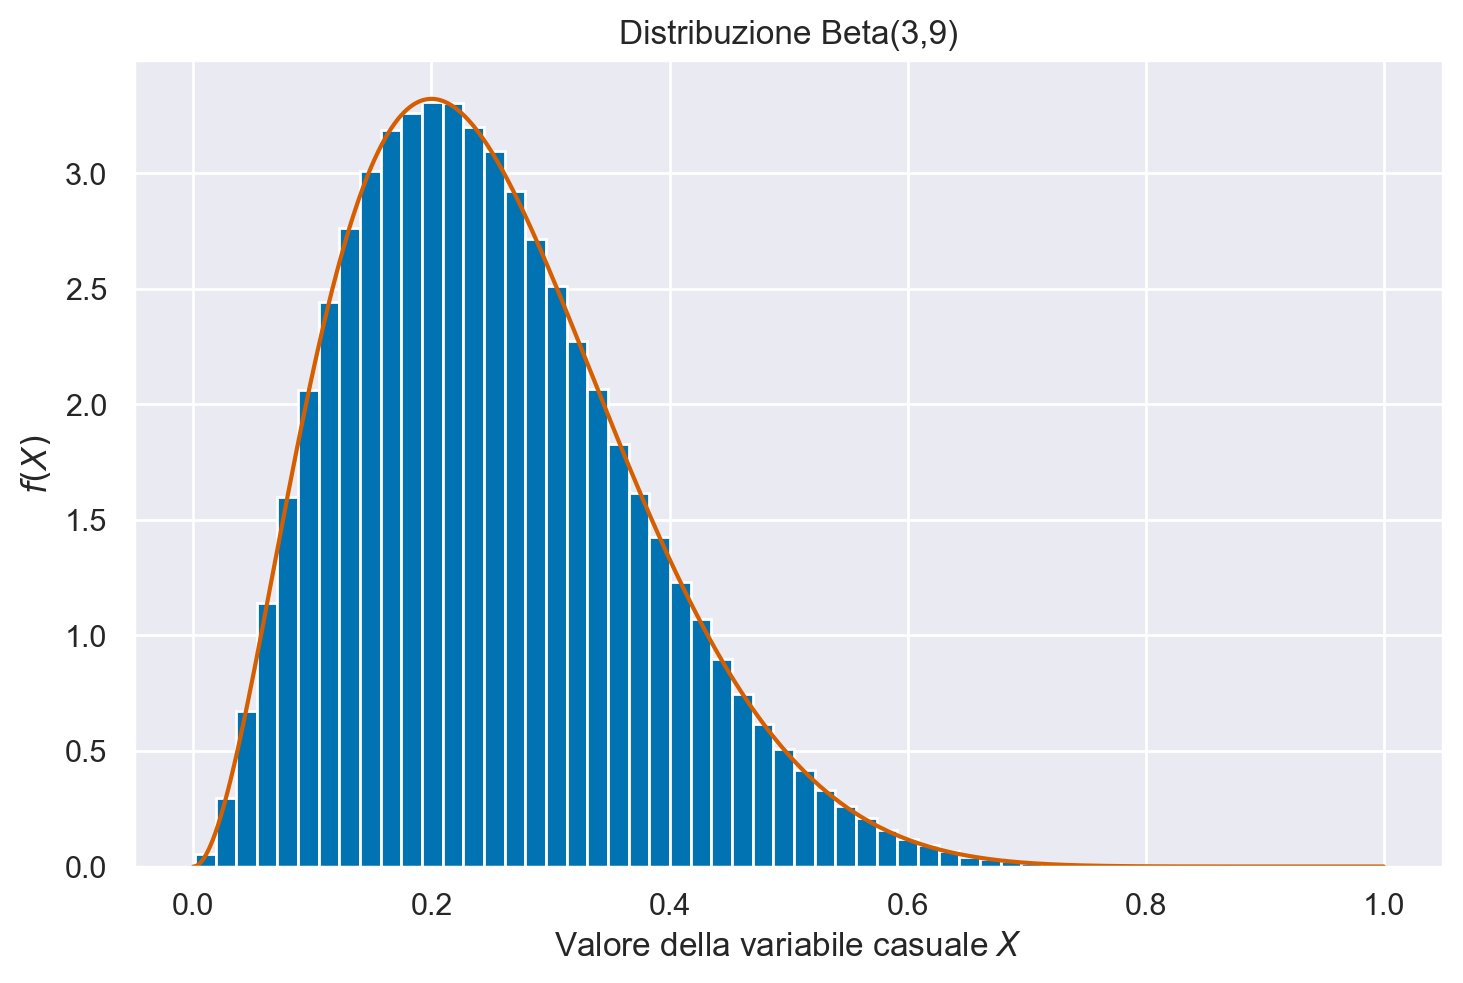

In [8]:
a = 3
b = 9
# create x's
xs = np.linspace(0, 1, 100001)
y_pdf = stats.beta.pdf(xs, a, b)
# create random samples
samps = rng.beta(a=a, b=b, size=n)
# plot them
plt.plot(xs, y_pdf, color="r")
plt.hist(samps, bins=50, density=True)
plt.title("Distribuzione Beta(3,9)")
plt.ylabel("$f(X)$")
plt.xlabel("Valore della variabile casuale $X$")

Text(0.5, 0, 'Valore della variabile casuale $X$')

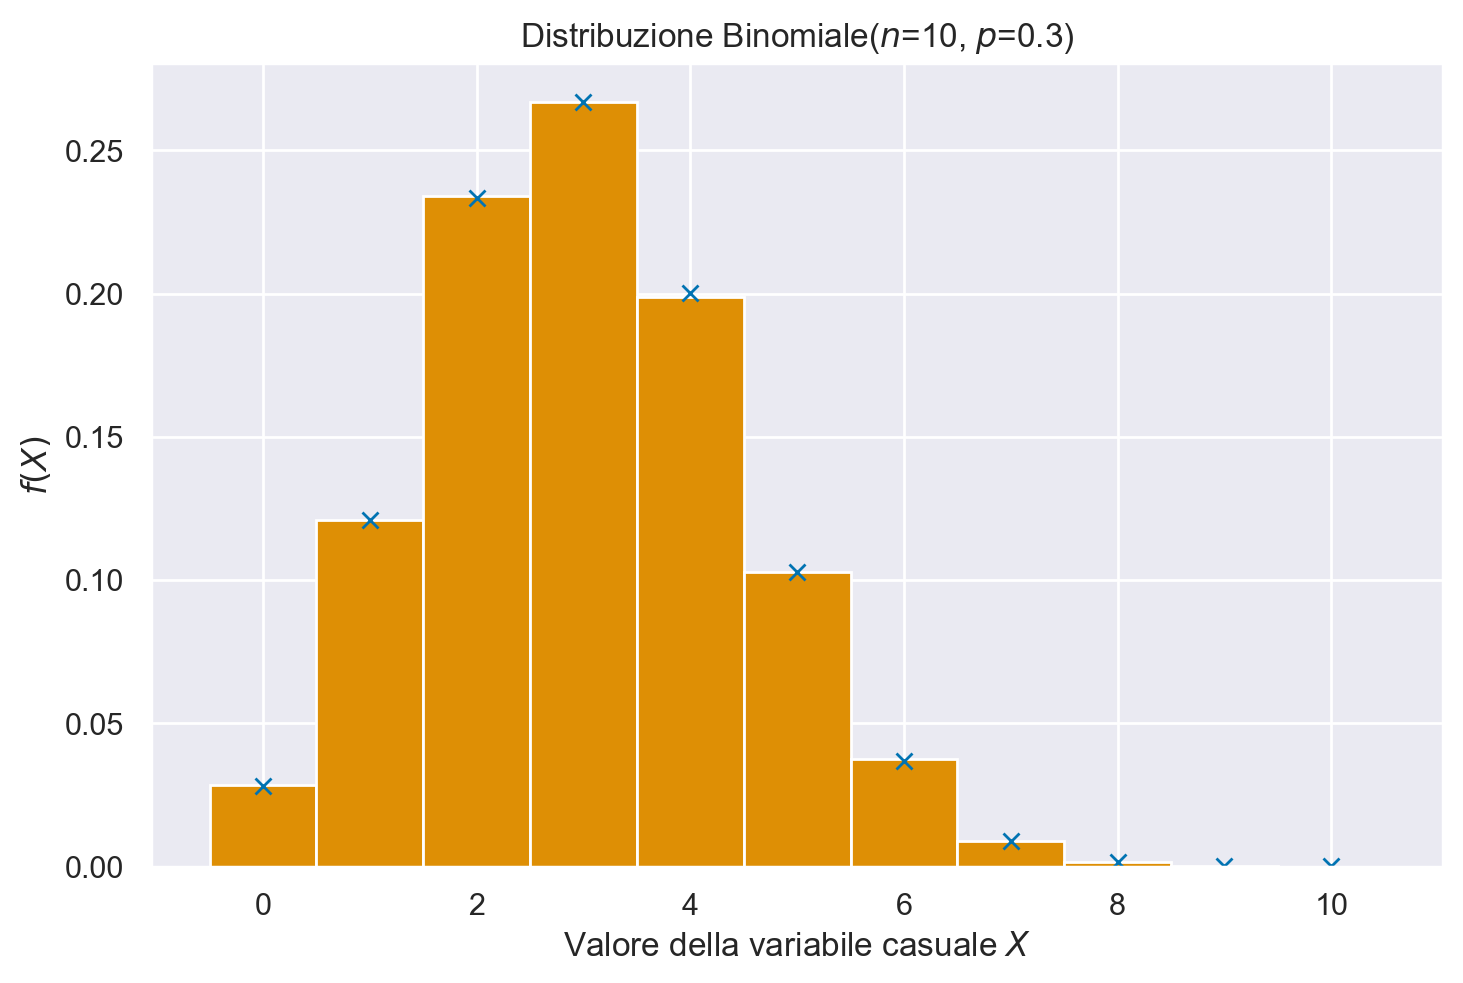

In [9]:
n = 10
p = 0.3
n_samples = 100001
# create r values
r_values = list(range(n + 1))
# pmf
y_pmf = [stats.binom.pmf(r, n, p) for r in r_values]
# create random samples
r_samps = rng.binomial(n=n, p=p, size=n_samples)
plt.plot(r_values, y_pmf, "x")
plt.hist(r_samps, bins=np.arange(-0.5, 11.5, 1), density=True)
plt.title("Distribuzione Binomiale($n$=10, $p$=0.3)")
plt.ylabel("$f(X)$")
plt.xlabel("Valore della variabile casuale $X$")

(-4.0, 4.0)

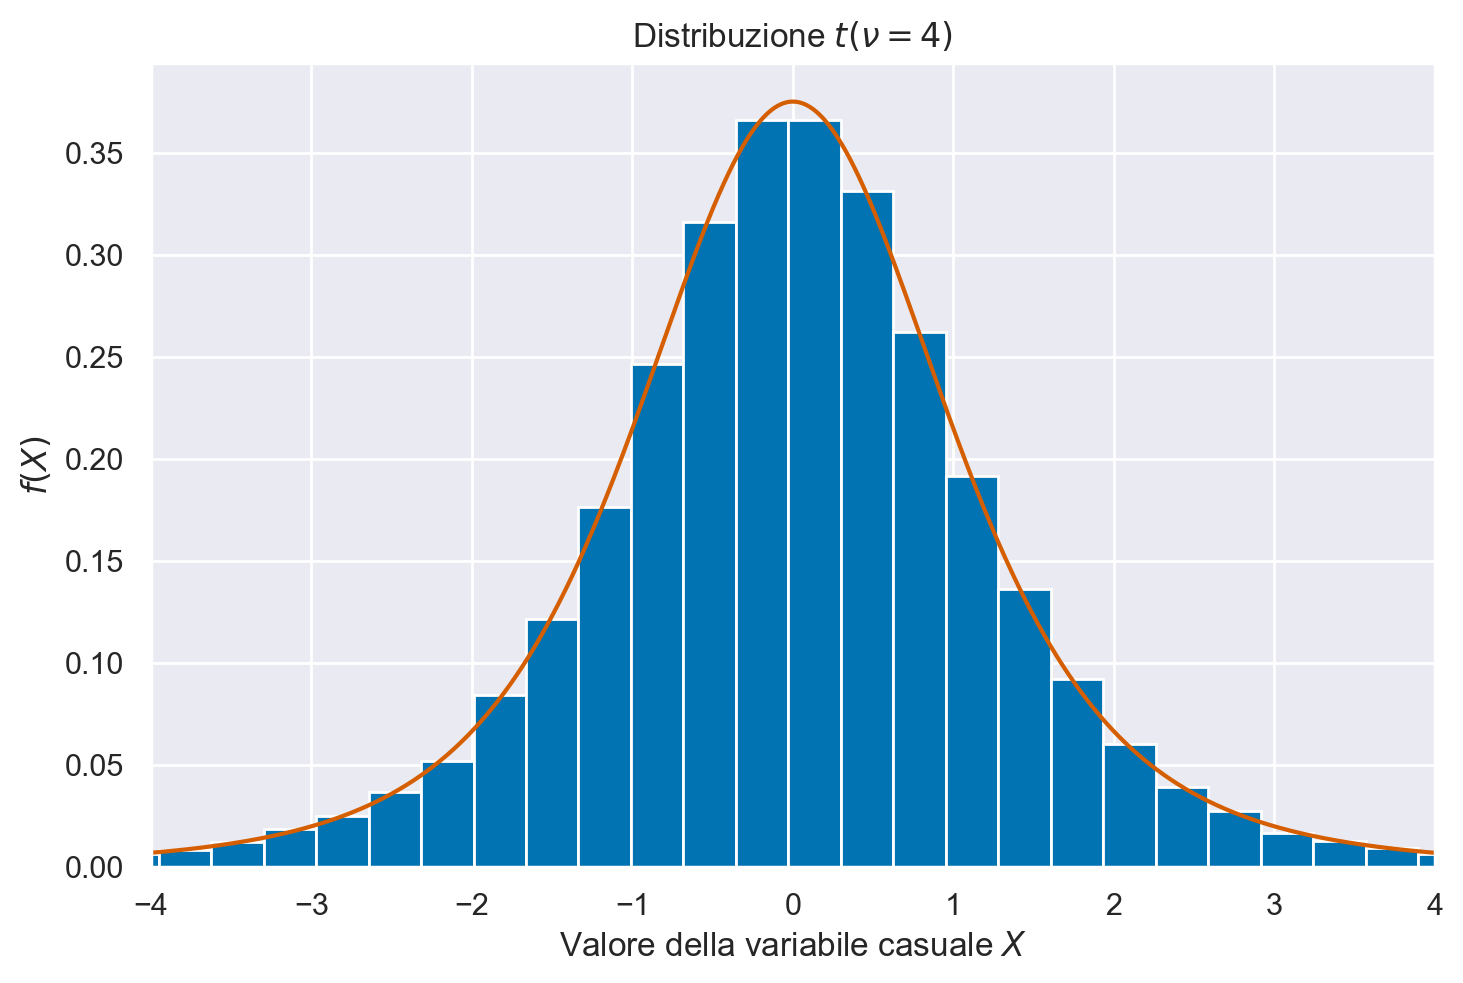

In [10]:
df = 4
size = 100001
# create x's
xs = np.linspace(-4, 4, 100001)
y_pdf = stats.t.pdf(xs, df=df)
# create random samples
samps = rng.standard_t(df=df, size=size)
# plot them
fig, ax = plt.subplots()
plt.plot(xs, y_pdf, color="r")
plt.hist(samps, bins=150, density=True)
plt.title("Distribuzione $t(\\nu=4)$")
plt.ylabel("$f(X)$")
plt.xlabel("Valore della variabile casuale $X$")
plt.xlim(-4, 4)

In [11]:
# Define the set of values
x_rv = [1, 2, 3, 4]
# Define the weights for each value
weights = [0.1, 0.1, 0.3, 0.5]

x_sample = rng.choice(x_rv, size=10, p=weights)
print(f"Random Sample: {x_sample}")

Random Sample: [3 1 1 4 4 4 3 4 4 1]


([<matplotlib.axis.XTick at 0x144390c10>,
 [Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3'), Text(4, 0, '4')])

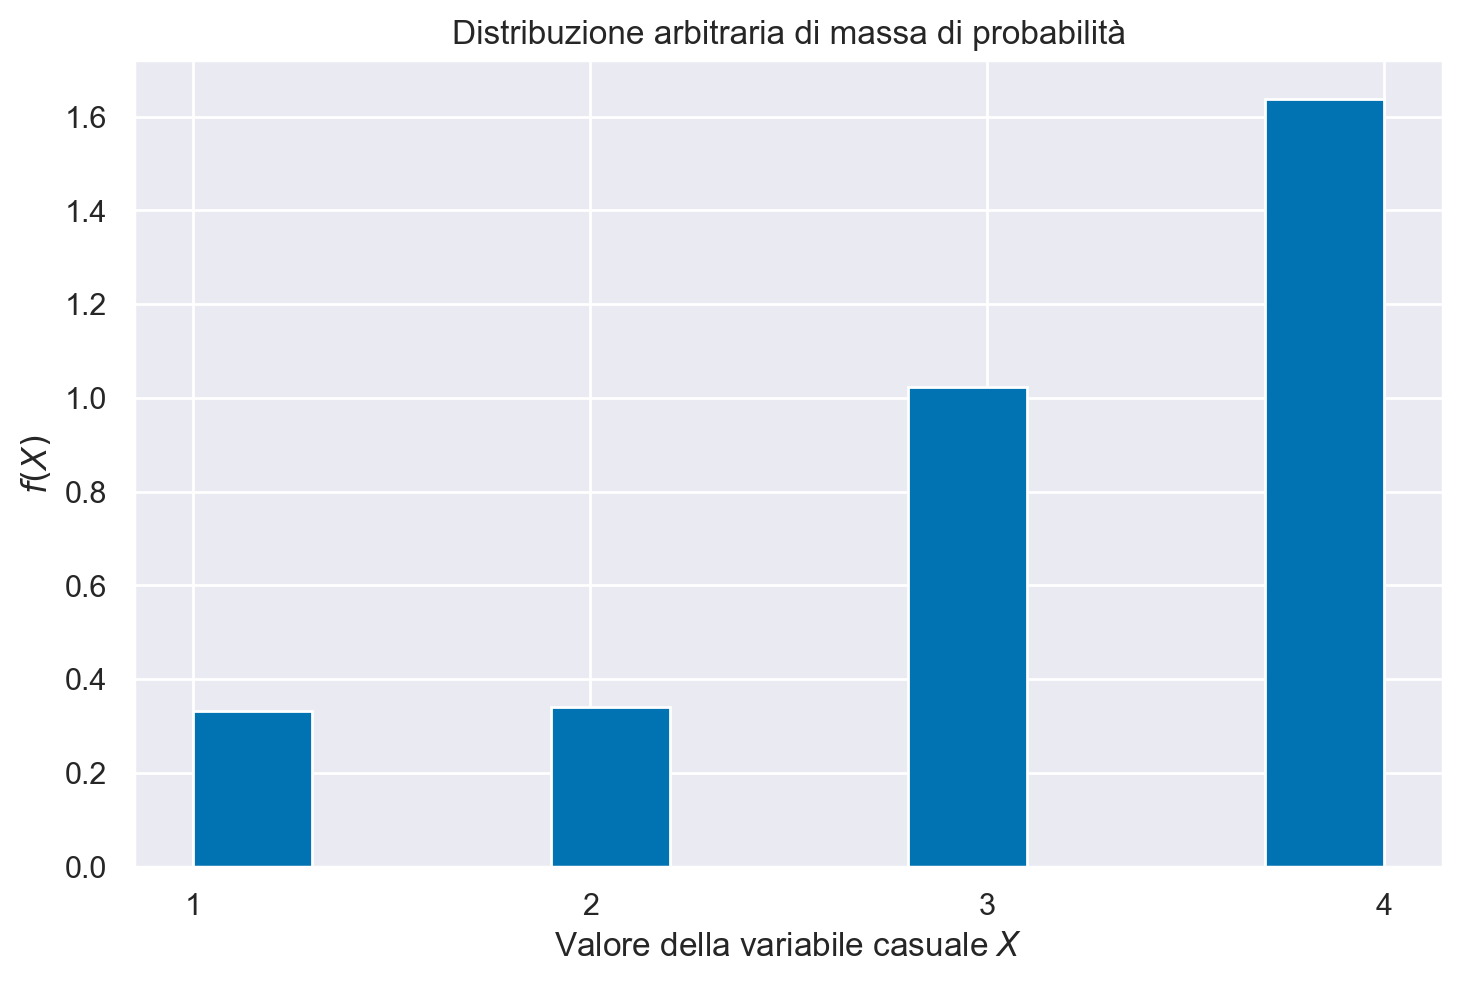

In [12]:
x = rng.choice(x_rv, size=10000, p=weights)
bins = plt.hist(x, density=True)
plt.title("Distribuzione arbitraria di massa di probabilità")
plt.ylabel("$f(X)$")
plt.xlabel("Valore della variabile casuale $X$")
plt.xticks(x_rv)

In [13]:
%watermark -n -u -v -iv -w -p pytensor

Last updated: Sun Sep 17 2023

Python implementation: CPython
Python version       : 3.11.5
IPython version      : 8.15.0

pytensor: 2.12.3

numpy     : 1.25.2
scipy     : 1.10.1
matplotlib: 3.7.2
arviz     : 0.16.0
seaborn   : 0.12.2
pandas    : 2.0.3

Watermark: 2.4.3

